#### **Linear Regression Model**

A linear regression model, tries tof it a straight line over the data. Hence the equation becomes  
$$ \hat{y_i} = a.x_i + b $$
where a and b are the parameters that the model tries to learn in order to reduce the cost function.  

#### **Cost Function**

Let us start by using MSE (Mean Square Error) as our cost function, which takes the square of the residual error (the difference betweent the predicted output and the actual output)
$$ J(a, b) = \frac {1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = \frac {1}{n} \sum_{i=1}^{n} (y_i - a.x_i - b)^2 $$

#### **Gradient Descent**

Now, to find how to change a and b, we use the gradient descent method. We start with a random value of a and b, and then we try to move in the opposite direction of the slope multiplied by a learning rate, that decides how far the steps are.

$$ \frac{\partial{J(a, b)}}{\partial{a}} = \frac{2}{n} \sum_{i=1}^{n} (a.x_i^2 - x_i.y_i + b.x_i) $$
$$ \frac{\partial{J(a, b)}}{\partial{b}} = \frac{2}{n} \sum_{i=1}^{n} (b - y_i + a.x_i) $$

#### **Implementation**

Let's start with the implementation of the gradient descent, that gets the values of the parameters and generates new value of parameters.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from time import sleep
from IPython.display import display, clear_output
import sys

In [2]:
def MSE(x, y, a, b):
    return (np.sum(y - a*x - b)*np.sum(y - a*x - b))/(y.size)

In [3]:
# this function takes a value of a and b and after doing gradient descent returns the new values
def gradient_descent(x, y, a, b, lr):
    n = y.size
    a = a - (lr * 2 * np.sum(a * x * x - x * y + b * x))/n
    b = b - (lr * 2 * np.sum(b - y + a * x))/n
    return (a, b)

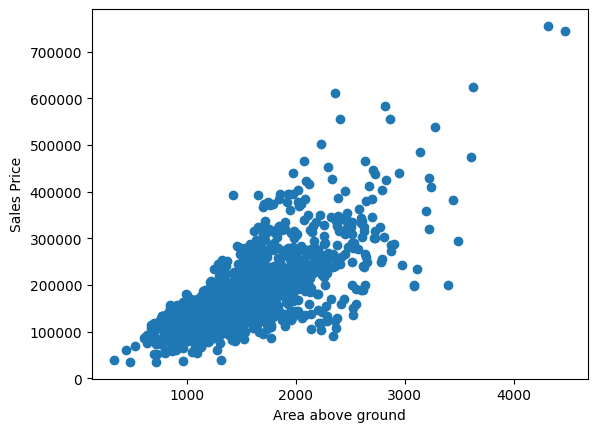

In [4]:
# Load the training data
data = pd.read_csv('train.csv')
# clipping the outliers
data = data[data['GrLivArea'] < 4600]

x = np.array(data['GrLivArea'])
y = np.array(data['SalePrice'])

plt.scatter(x, y)
plt.xlabel('Area above ground')
plt.ylabel('Sales Price')
plt.show()

Let us scale the data, so that the values of the parameters are not too big.

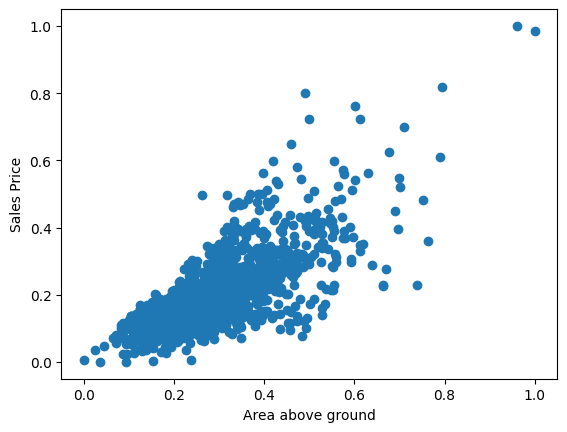

In [5]:
y = np.array([(a-np.min(y))/(np.max(y)-np.min(y)) for a in y])
x = np.array([(a-np.min(x))/(np.max(x)-np.min(x)) for a in x])
plt.scatter(x, y)
plt.xlabel('Area above ground')
plt.ylabel('Sales Price')
plt.show()

It is visible, a linear model can fit reasonably well into the data. It might not be the best model for this dataset, but can be used for testing it out.  
Let us assume the starting line has an intercept of 0.2 and it passes through (1, 0). Hence on using the equation
$$ \hat{y} = a.x + b \implies a = -0.2 \space at \space x = 1, b = 0.2 $$  
Let us see how the initial linear model looks like with the equation,
$$ \hat{y} = -0.2x + 0.2 $$

In [6]:
a = -0.2
b = 0.2

In [7]:
def train_model(x, y, a, b):
    y_pred = [-0.2*v+0.2 for v in [0, 1]]
    plt.scatter(x, y)
    plt.xlabel('Area above ground')
    plt.ylabel('Sales Price')
    plt.plot(y_pred, 'r')
    plt.show()

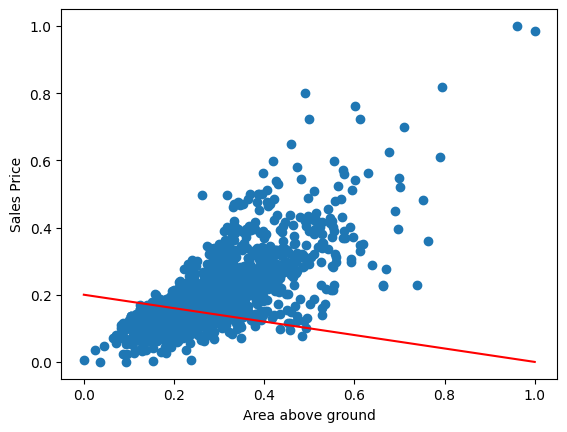

In [8]:
train_model(x, y, a, b)

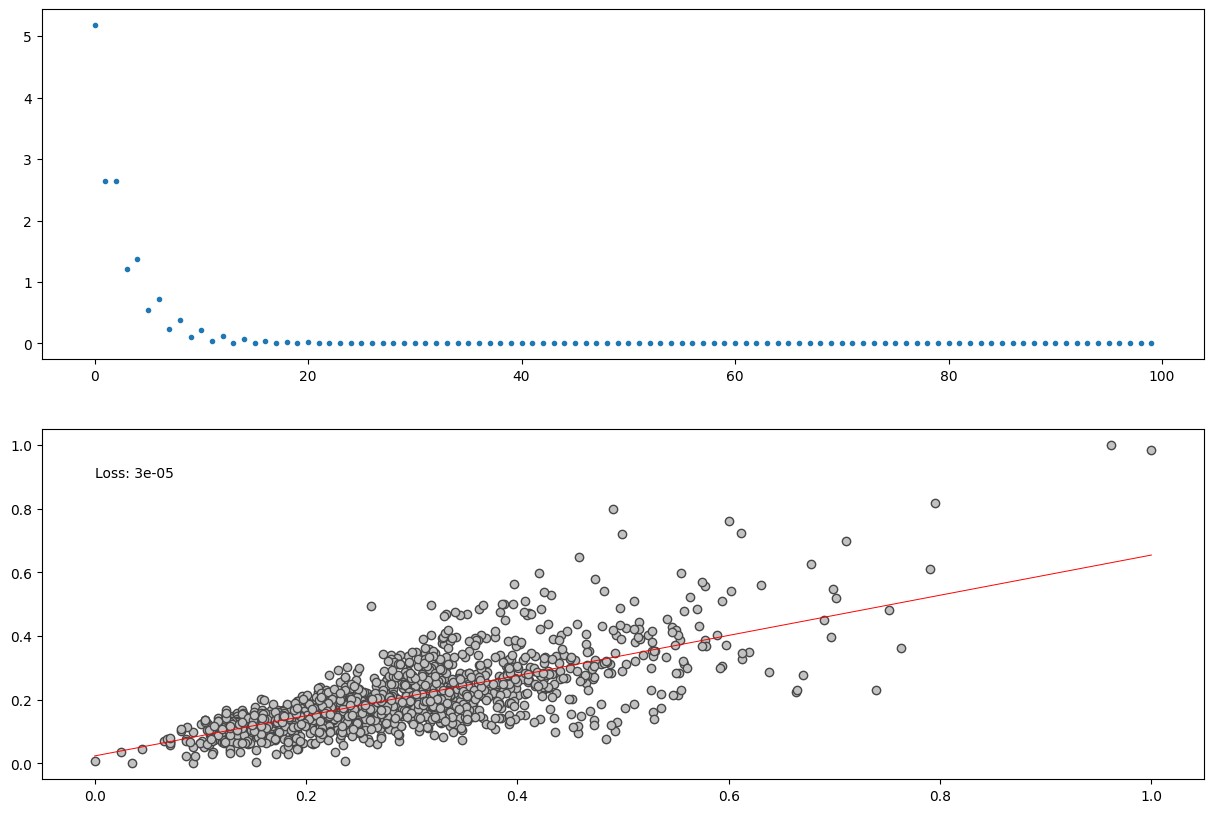

In [9]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax2.set_xlim(0, 1)

x_temp = np.array([])
y_temp = np.array([])

a_values = []
b_values = []

lr = float(input("Enter the value of learning rate: "))
epochs = int(input("Enter the number of epochs: "))

if(epochs <= 0):
    raise Exception("Please enter a valid value")
else:
    for i in range(0, epochs):
        
        loss = MSE(x, y, a, b)
        
        x_temp = np.append(x_temp, [i])
        y_temp = np.append(y_temp, [loss])
        (a, b) = gradient_descent(x, y, a, b, 1)
        a_values.append(a)
        b_values.append(b)

        ax.set_xlim(0, i)
        ax.cla()
        ax.plot(x_temp, y_temp, '.')
        
        ax2.cla()
        ax2.scatter(x, y, facecolors='#c2c2c2', edgecolors='#474747')
        ax2.annotate("Loss: " + str(round(loss, 5)), xy=(0, 0.9))
        y_pred = [a*v+b for v in [0, 1]]
        ax2.plot(y_pred, 'r', linewidth=0.7)
        display(fig)

        clear_output(wait = True)
        plt.pause(0.0005)